![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Análisis de reducción de dimensionalidad: PCA y t-SNE
## Objetivo General
En este trabajo, se busca que pongas en práctica la aplicación de algoritmos de reducción de dimensionalidad. El objetivo es aplicar técnicas para reducir la dimensionalidad a 2D, graficar los resultados y seleccionar la mejor técnica para los datos. Además, deberás detallar los pasos a seguir para la reducción de dimensionalidad y analizar los resultados obtenidos.

### Objetivos específicos 
* Entender los métodos de t-SNE y PCA.
* Realizar la reducción de dimensionalidad utilizando t-SNE y PCA.
* Comparar los resultados obtenidos con ambos métodos.
* Aplicar LDA para reducir el dataset a una bolsa de palabras por cada etiqueta.

### Tareas a Realizar:
Debes realizar esta actividad en el Notebook adjunto. A medida que avances, completa el código solicitado y responde a las preguntas que se plantean.
Las tareas a realizar son:

* Reducción de Dimensionalidad con t-SNE y PCA:
* Completa el código proporcionado en el notebook.
* Responde a las preguntas finales sobre los resultados obtenidos.

#### Punto adicional: Aplicación de LDA:

Utiliza la técnica de LDA para generar una bolsa de palabras para cada una de las etiquetas.





### Coloca en este espacio el nombre del estudiante

MARIANO ORTEGA DE MUES

### Dataset

#### Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:
* Eliminación de nulos y duplicados
* Eliminación de URLs, emojis y menciones a los periódicos
* Eliminación de filas vacías
* Limpieza y homogeneización de datos.
* Convertir la totalidad del texto a minúscula
* Eliminar signos de puntuación
* Eliminar números
* Eliminar espacios en blanco adicionales
* Eliminar palabras con longitud menor a 2 caracteres
* Eliminar stopwords
* Tokenización
* Lematización

Proceso de extracción de características
* Conteo de palabras positivas (A)
* Conteo de palabras negativas (B)
* Conteo del número de bigrams más comunes (C)
* Conteo del número de menciones a otros usuarios (D)
* Categoría del sentimiento según librería ‘pysentimiento’ en español (E)
* Estandarización de las características (A_t,..E_t)
* Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

### Lectura de datos

In [1]:
import pandas as pd

# Leer el archivo CSV
file_path = 'out.csv'
data = pd.read_csv(file_path)

# Obtener el número de filas y columnas
num_filas, num_columnas = data.shape

# Mostrar el número de filas y columnas
print(f"El dataset tiene {num_filas} filas y {num_columnas} columnas.")

El dataset tiene 10000 filas y 22 columnas.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           10000 non-null  int64  
 1   B           10000 non-null  int64  
 2   C           10000 non-null  int64  
 3   D           10000 non-null  int64  
 4   E           10000 non-null  int64  
 5   comentario  10000 non-null  object 
 6   label       10000 non-null  float64
 7   A_t         10000 non-null  float64
 8   B_t         10000 non-null  float64
 9   C_t         10000 non-null  float64
 10  D_t         10000 non-null  float64
 11  E_t         10000 non-null  float64
 12  Valor_1     10000 non-null  float64
 13  Valor_2     10000 non-null  float64
 14  Valor_3     10000 non-null  float64
 15  Valor_4     10000 non-null  float64
 16  Valor_5     10000 non-null  float64
 17  Valor_6     10000 non-null  float64
 18  Valor_7     10000 non-null  float64
 19  Valor_8     10000 non-null

In [3]:
data.describe()

,A,B,C,D,E,label,A_t,B_t,C_t,D_t,...,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.957400,26.098100,5.674600,0.091300,2.200600,0.500000,0.735989,0.895389,1.014276,-0.241571,...,2.448370,2.515129,-0.222304,-0.324603,3.343632,-0.302639,-0.756762,-0.286422,-0.357238,-0.050935
std,1.741864,34.012341,7.317149,0.352671,2.729488,0.500025,1.863010,1.672944,1.844389,0.676008,...,8.690527,9.827254,1.160914,1.547278,10.567912,1.045447,0.885760,1.218960,1.297408,1.129825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.287998,-0.388282,-0.416086,-0.416577,...,-2.197166,-3.582457,-10.573231,-11.207779,-1.393841,-6.558948,-8.362074,-9.067027,-11.559651,-5.886890
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.287998,-0.339096,-0.164022,-0.416577,...,-0.086494,-0.097950,-0.432068,-0.686619,-0.025057,-0.760297,-0.943189,-0.561697,-0.716113,-0.993166
50%,0.000000,5.000000,3.000000,0.000000,0.000000,0.500000,-0.287998,-0.142350,0.340105,-0.416577,...,0.097659,0.047238,0.119973,-0.415081,0.063687,-0.043150,-0.808442,-0.141680,-0.314500,0.221244
75%,1.000000,46.000000,7.000000,0.000000,6.000000,1.000000,0.781552,1.874292,1.348361,-0.416577,...,1.157323,0.659812,0.119973,0.152955,2.527222,0.141260,-0.314174,0.068328,0.087112,0.221244
max,24.000000,328.000000,88.000000,6.000000,6.000000,1.000000,25.381200,15.744855,21.765536,11.084360,...,332.263677,246.545947,21.283302,60.511589,331.989523,20.009412,19.361276,28.053013,23.045933,17.286505


In [4]:
data.head()

,A,B,C,D,E,comentario,label,A_t,B_t,C_t,...,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
0,2,64,30,0,2,"pandemia,originado,covid,cierto,incidencia,aba...",0.0,1.851102,2.759647,7.145831,...,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560
1,4,70,21,0,0,"ser,mes,larga,espera,llegar,momento,siempre,pr...",0.0,3.990202,3.054765,4.877255,...,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244
2,4,88,50,0,0,"cartagena,san,sebastiar,fuengirola,irun,orense...",0.0,3.990202,3.940120,12.187108,...,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244
3,3,38,21,0,0,"pleno,dia,verano,calor,plan,mas,apetecibl,disf...",0.0,2.920652,1.480801,4.877255,...,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244
4,0,59,17,0,0,"pasado,junio,celebro,dia,luchar,frente,leishma...",0.0,-0.287998,2.513715,3.869000,...,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244


In [5]:
data['label'].unique()

array([0., 1.])

### .- En la columna label solo hay dos valores unicos: 0. y 1.

In [6]:
frecuencia_labels = data['label'].value_counts()
print(frecuencia_labels)

label
0.0    5000
1.0    5000
Name: count, dtype: int64


In [7]:
estadisticos_por_categoria = data.groupby('label').describe()
print(estadisticos_por_categoria)


            A                                                   B           \
        count    mean       std  min  25%  50%  75%   max   count     mean   
label                                                                        
0.0    5000.0  1.6194  2.158304  0.0  0.0  1.0  2.0  24.0  5000.0  50.9658   
1.0    5000.0  0.2954  0.730647  0.0  0.0  0.0  0.0   7.0  5000.0   1.2304   

       ...   Valor_9            Valor_10                                \
       ...       75%        max    count      mean       std       min   
label  ...                                                               
0.0    ... -0.180630  23.045933   5000.0  0.151905  0.280286 -3.850846   
1.0    ...  0.209901  12.228865   5000.0 -0.253774  1.546739 -5.886890   

                                                
            25%       50%       75%        max  
label                                           
0.0    0.221244  0.221244  0.221244   3.576752  
1.0   -0.993166 -0.993166  0.018842  17.28

In [8]:
df = data.loc[:, ~data.columns.str.startswith('Valor_') & ~data.columns.str.contains('comentario')]

# Mostrar el DataFrame resultante
df.head()


,A,B,C,D,E,label,A_t,B_t,C_t,D_t,E_t
0,2,64,30,0,2,0.0,1.851102,2.759647,7.145831,-0.416577,0.440638
1,4,70,21,0,0,0.0,3.990202,3.054765,4.877255,-0.416577,-0.531099
2,4,88,50,0,0,0.0,3.990202,3.940120,12.187108,-0.416577,-0.531099
3,3,38,21,0,0,0.0,2.920652,1.480801,4.877255,-0.416577,-0.531099
4,0,59,17,0,0,0.0,-0.287998,2.513715,3.869000,-0.416577,-0.531099


Como indica el enunciado del ejercicio A_t, B_t, C_t, D_t y E_t contienen los datos ya estandarizados de A,B,C,D y E. Ya que los voy a calcular despues los elimino.

In [9]:
df=df.drop(columns=['A_t','B_t','C_t','D_t','E_t'])

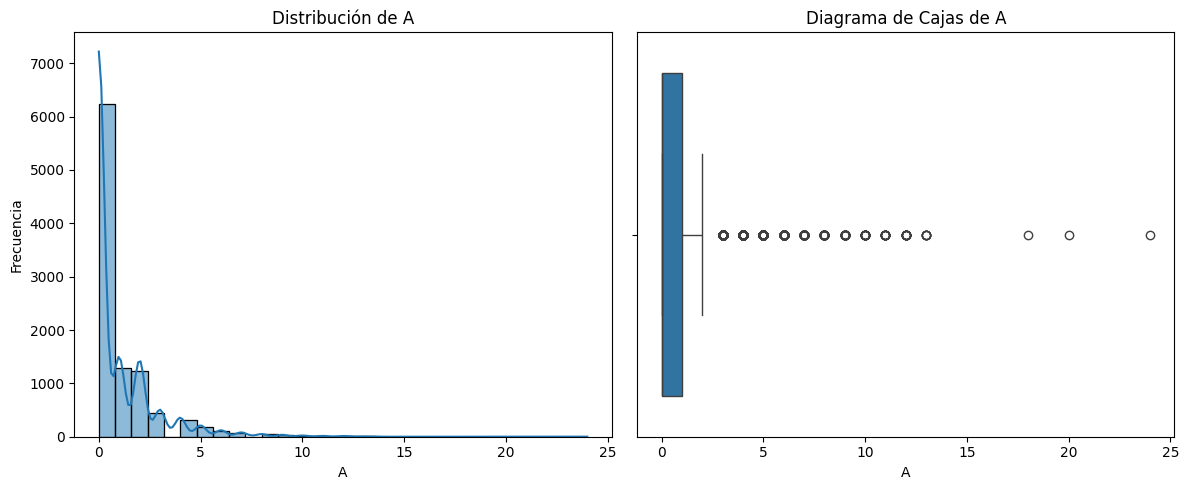

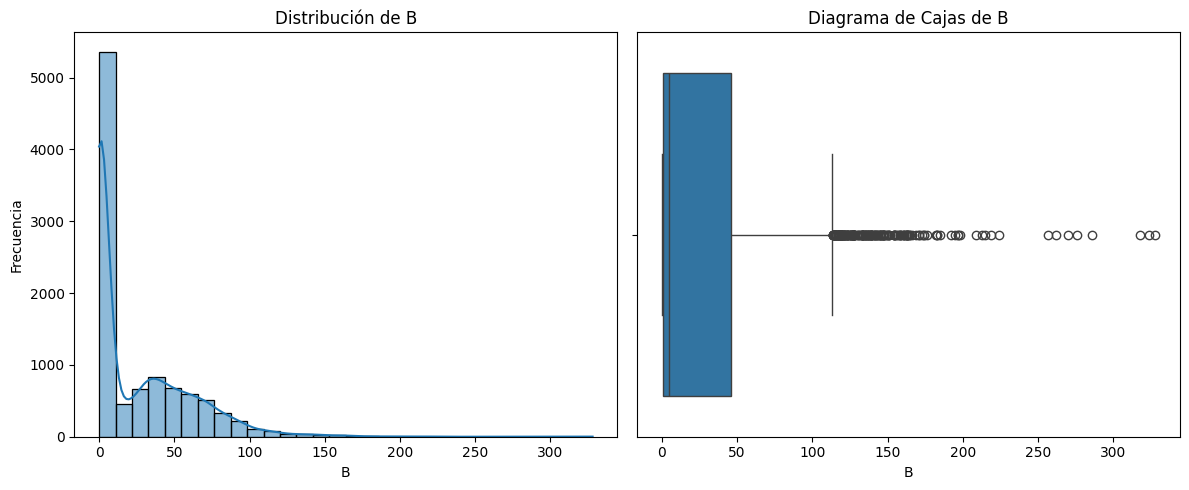

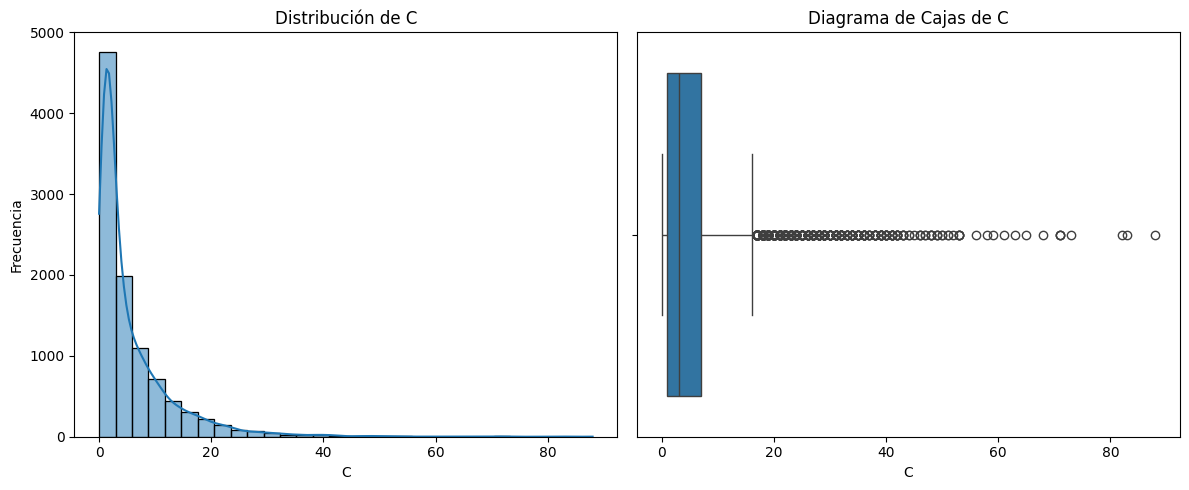

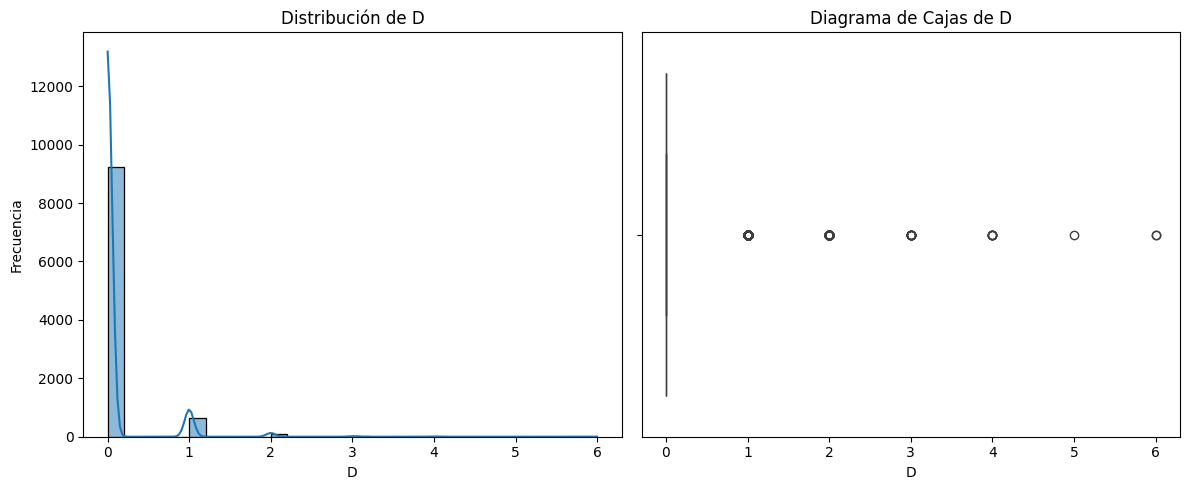

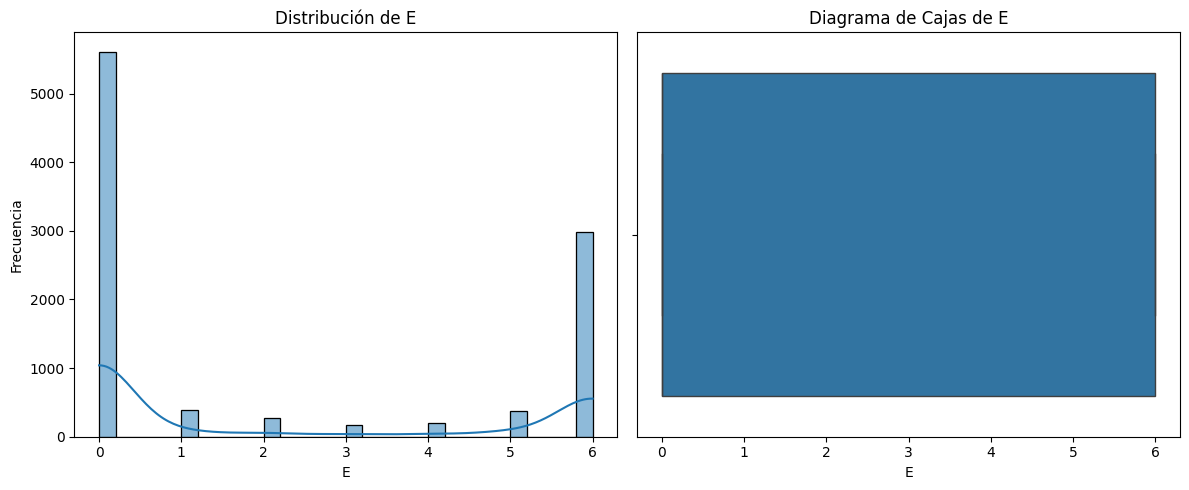

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir las columnas a visualizar
columnas = [col for col in df.columns if col != 'label']

# Crear los gráficos
for columna in columnas:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Diagrama de distribución
    sns.histplot(df[columna], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'Distribución de {columna}')
    axes[0].set_xlabel(columna)
    axes[0].set_ylabel('Frecuencia')
    
    # Diagrama de cajas
    sns.boxplot(x=df[columna], ax=axes[1])
    axes[1].set_title(f'Diagrama de Cajas de {columna}')
    axes[1].set_xlabel(columna)
    
    plt.tight_layout()
    plt.show()

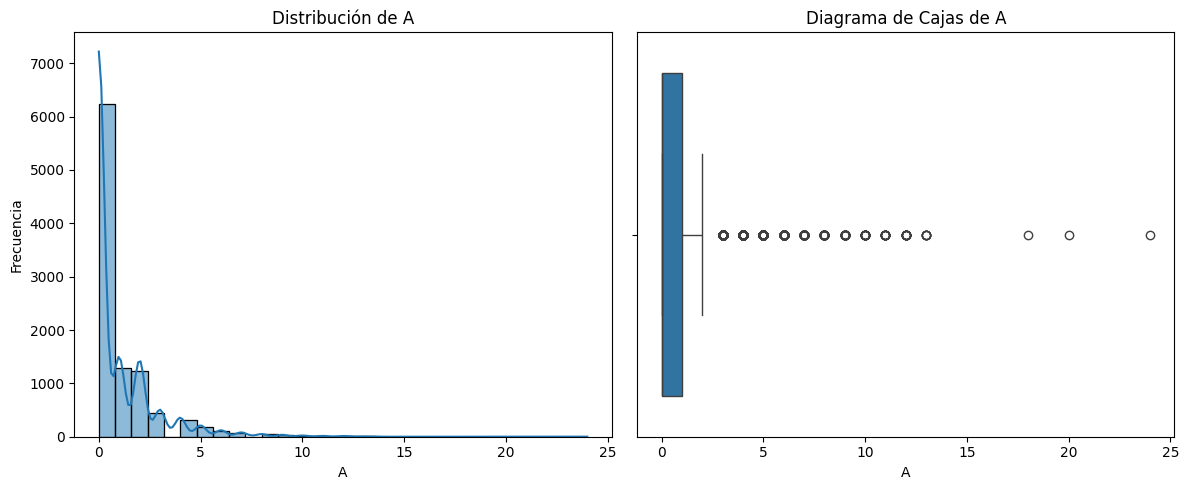

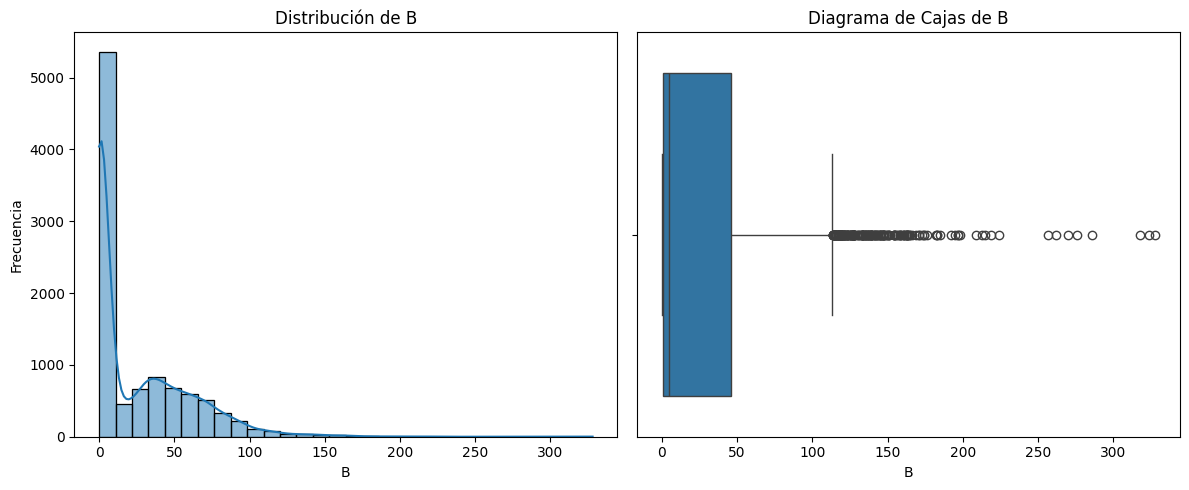

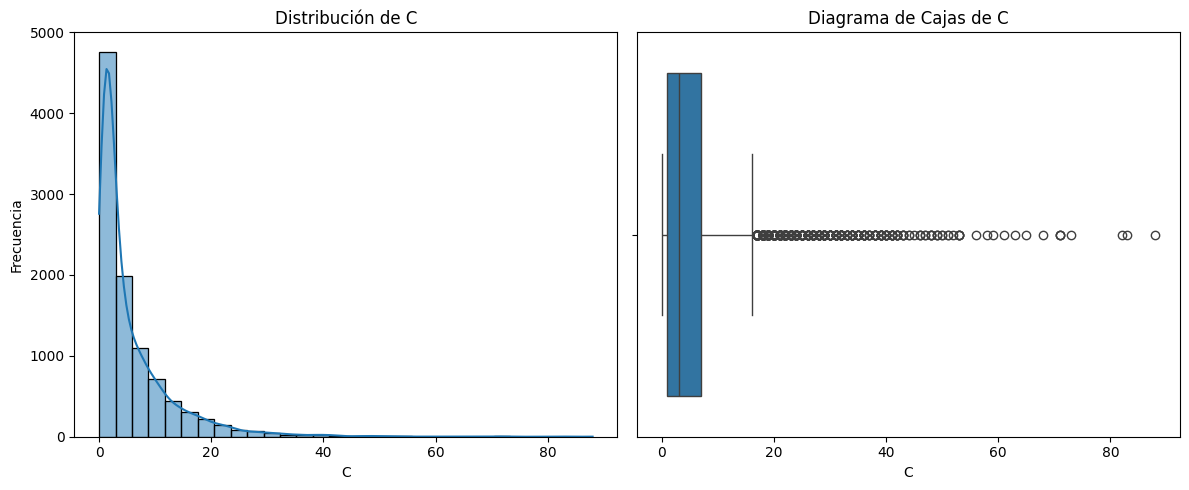

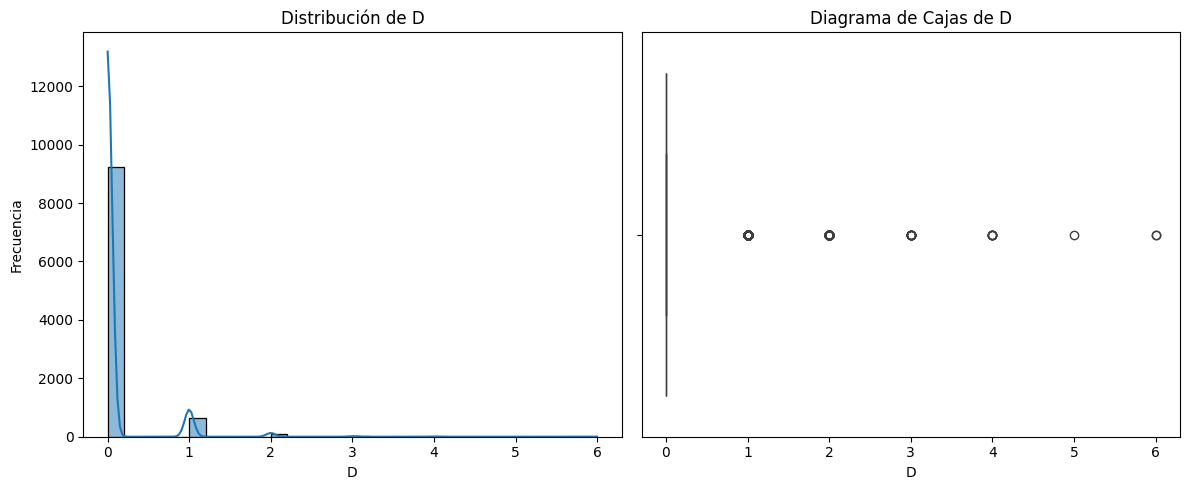

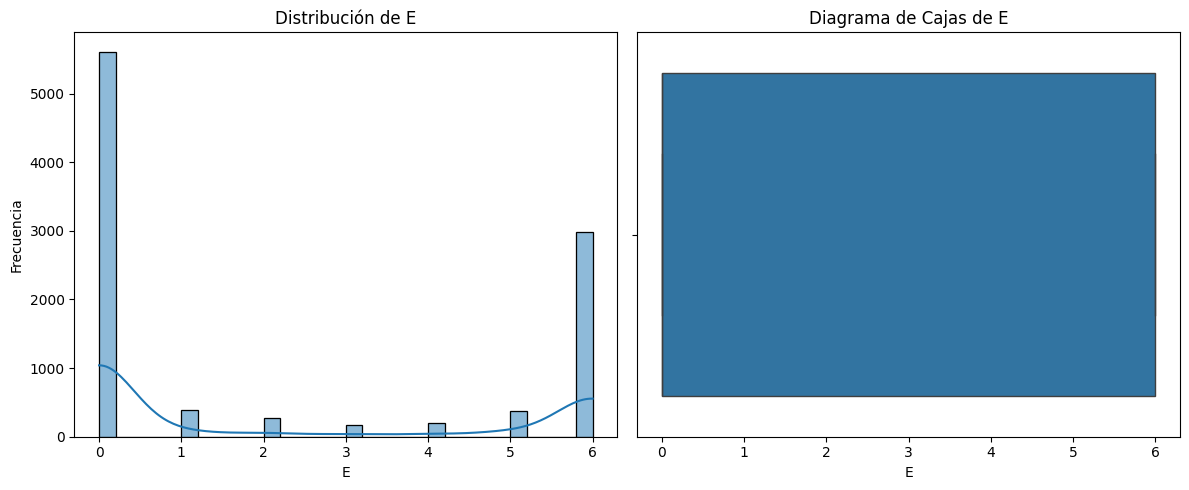

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir las columnas a visualizar
columnas = [col for col in df.columns if col != 'label']

# Crear los gráficos
for columna in columnas:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Diagrama de distribución
    sns.histplot(df[columna], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'Distribución de {columna}')
    axes[0].set_xlabel(columna)
    axes[0].set_ylabel('Frecuencia')
    
    # Diagrama de cajas
    sns.boxplot(x=df[columna], ax=axes[1])
    axes[1].set_title(f'Diagrama de Cajas de {columna}')
    axes[1].set_xlabel(columna)
    
    plt.tight_layout()
    plt.show()

In [12]:
for columna in df.columns[:5]:
    print(f"Valores únicos en la columna '{columna}':")
    print(df[columna].unique())
    print("-" * 50)


Valores únicos en la columna 'A':
[ 2  4  3  0  7  1  5  6  8  9 12 10 11 13 20 18 24]
--------------------------------------------------
Valores únicos en la columna 'B':
[ 64  70  88  38  59   3  50  40  17  43  52  42  57  53  56  34   6  48
  33  66  16  41  74  27  14  54  28  21  18   7   2 133   5  60   0   1
  10  23 122  12  13  75 106  32  44 120  22  25  30  35  19  61  79  37
  39  68  58  26  47   9  31  29  15  45   4  67   8  84  11  62  49  69
  46  63  24  73 117 163  95  82 104  36  20  51  65 139  89  71  77  93
  55  72  76  83 119 108 116  97  87 113  90  85 101  94  96 105  81 107
 127 161  86 110 112 114  92  78 182  91 215 155 109 100 102  99 183 270
 121 257 173 159 136 135 324  80 142 276 103 154 164 118 192 171 130 165
 209 148 198 150 128 158 132 224 149 140 131 138 151  98 176 115 197 286
 137 262 124 145 328 111 219 185 174 134 147 157 141 123 144 195 126 166
 156 160 169 143 125 146 162 213 318]
--------------------------------------------------
Valores ú

Algunas de las columnas parecen contener ordinales como D y E, voy a emplear un Escalador Min-Max.

In [13]:
from sklearn.preprocessing import MinMaxScaler

df_normalizado = df.copy()
scaler = MinMaxScaler()
columnas_a_normalizar = df_normalizado.columns.difference(['label'])
df_normalizado[columnas_a_normalizar] = scaler.fit_transform(df_normalizado[columnas_a_normalizar])
df_normalizado.head(10)

,A,B,C,D,E,label
0,0.083333,0.195122,0.340909,0.0,0.333333,0.0
1,0.166667,0.213415,0.238636,0.0,0.000000,0.0
2,0.166667,0.268293,0.568182,0.0,0.000000,0.0
3,0.125000,0.115854,0.238636,0.0,0.000000,0.0
4,0.000000,0.179878,0.193182,0.0,0.000000,0.0
5,0.000000,0.009146,0.011364,0.0,0.000000,0.0
6,0.291667,0.152439,0.068182,0.0,0.000000,0.0
7,0.000000,0.121951,0.056818,0.0,0.000000,0.0
8,0.166667,0.051829,0.011364,0.0,0.000000,0.0
9,0.083333,0.195122,0.136364,0.0,0.000000,0.0


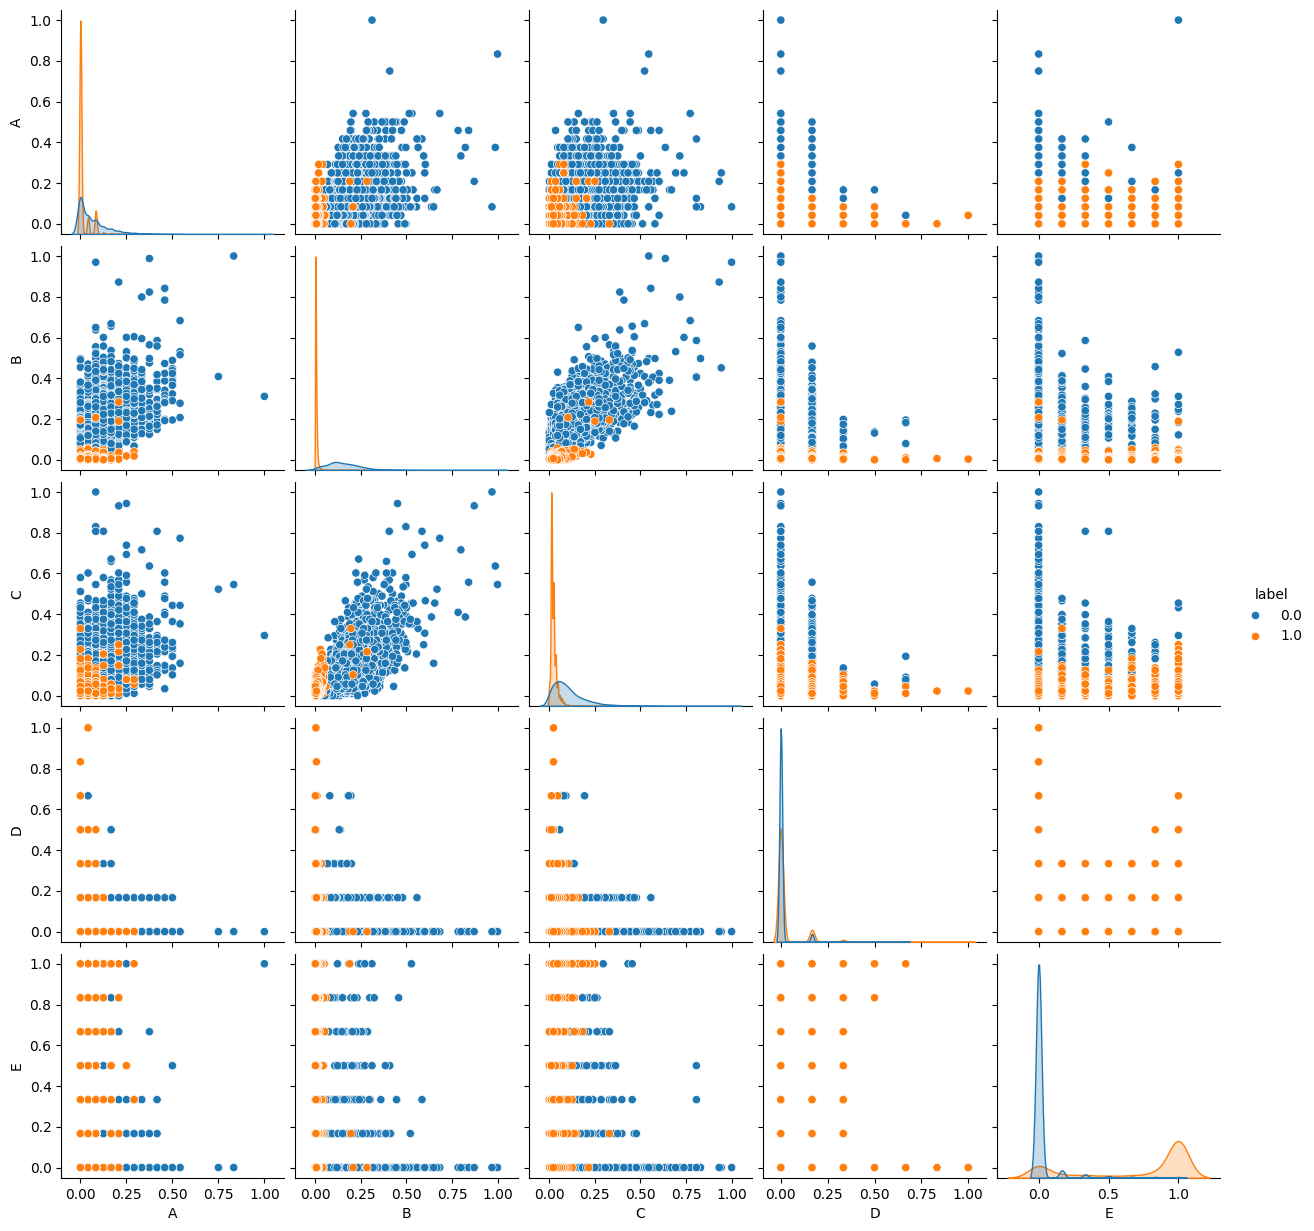

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_normalizado, hue='label', diag_kind='kde')
plt.show()


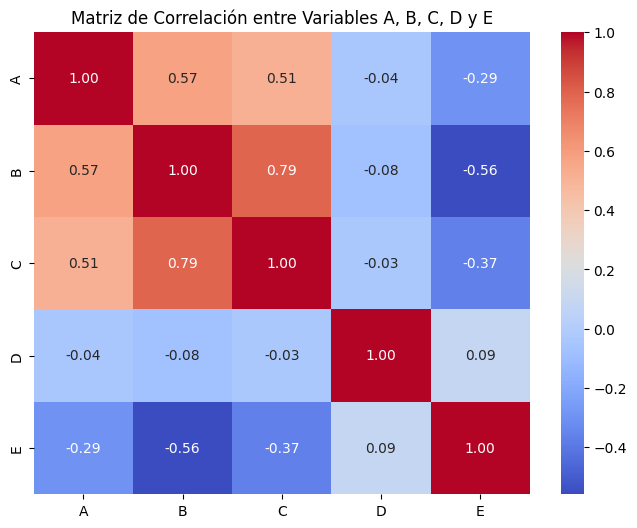

In [15]:
df_variables= df_normalizado.drop(columns=['label'])
matriz_correlacion=df_variables.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables A, B, C, D y E")
plt.show()

.- A,B y C presentan cierta correlacion lineal positiva.

.- E presenta relacion lineal negativa con A,B y C.

.- D presenta independencia frente al resto de variables.

In [16]:

X = df_normalizado.drop(columns=['label'])
y = df_normalizado[['label']]

X.head()


,A,B,C,D,E
0,0.083333,0.195122,0.340909,0.0,0.333333
1,0.166667,0.213415,0.238636,0.0,0.000000
2,0.166667,0.268293,0.568182,0.0,0.000000
3,0.125000,0.115854,0.238636,0.0,0.000000
4,0.000000,0.179878,0.193182,0.0,0.000000


In [17]:
y.head()

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### PCA

In [18]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
n_componentes = np.argmax(varianza_acumulada >=1 ) + 1
print(f"Número de componentes necesarios para explicar el 100% de la varianza: {n_componentes}")


Número de componentes necesarios para explicar el 100% de la varianza: 5


In [19]:
cargas_componentes = pd.DataFrame(
    pca.components_[:5],  # Solo los primeros 5 componentes
    columns=X.columns, 
    index=[f'PC{i+1}' for i in range(5)]
)

cargas_componentes

,A,B,C,D,E
PC1,-0.049855,-0.132722,-0.072386,0.011550,0.987181
PC2,0.409799,0.679107,0.588762,-0.010946,0.155298
PC3,0.017782,-0.031789,0.045930,0.998212,-0.011687
PC4,0.904971,-0.237889,-0.352467,-0.007619,-0.012036
PC5,0.101438,-0.680879,0.722342,-0.057111,-0.032784


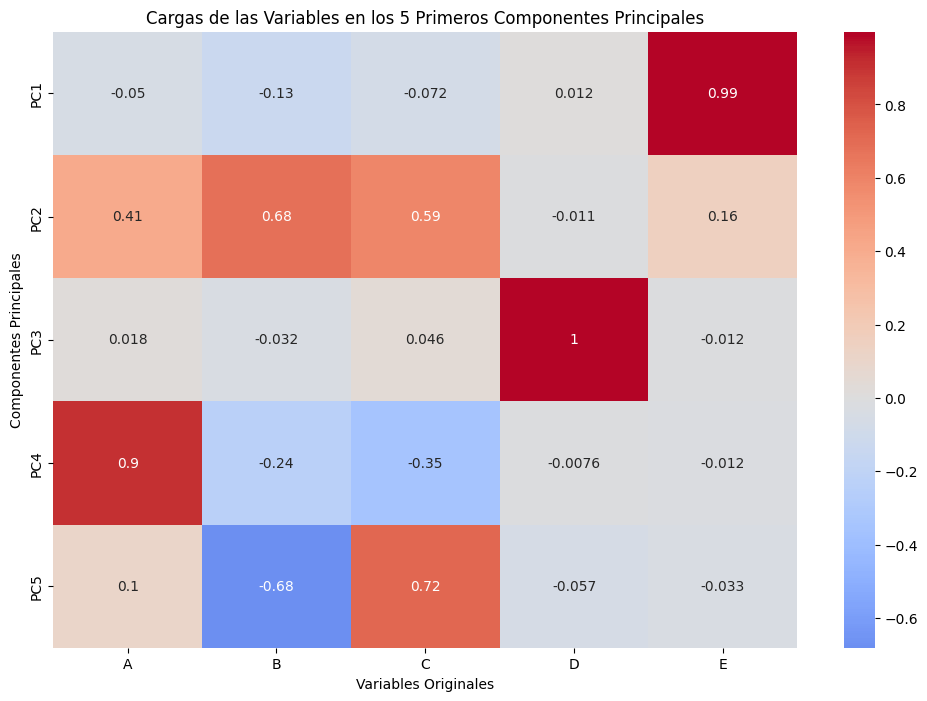

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(cargas_componentes, annot=True, cmap='coolwarm', center=0)
plt.title('Cargas de las Variables en los 5 Primeros Componentes Principales')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.show()

.- La variable E es predominante en la componentes PC1.

.- Las variables A,B y C contribuyen positivamente en PC2.

.- La variable D predominante en PC3 con una muy baja correlacion con el resto de variables.

In [21]:

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_[:5])
cargas_componentes['v_acumulado'] = varianza_acumulada
cargas_componentes

,A,B,C,D,E,v_acumulado
PC1,-0.049855,-0.132722,-0.072386,0.011550,0.987181,0.908672
PC2,0.409799,0.679107,0.588762,-0.010946,0.155298,0.965440
PC3,0.017782,-0.031789,0.045930,0.998212,-0.011687,0.980148
PC4,0.904971,-0.237889,-0.352467,-0.007619,-0.012036,0.993224
PC5,0.101438,-0.680879,0.722342,-0.057111,-0.032784,1.000000


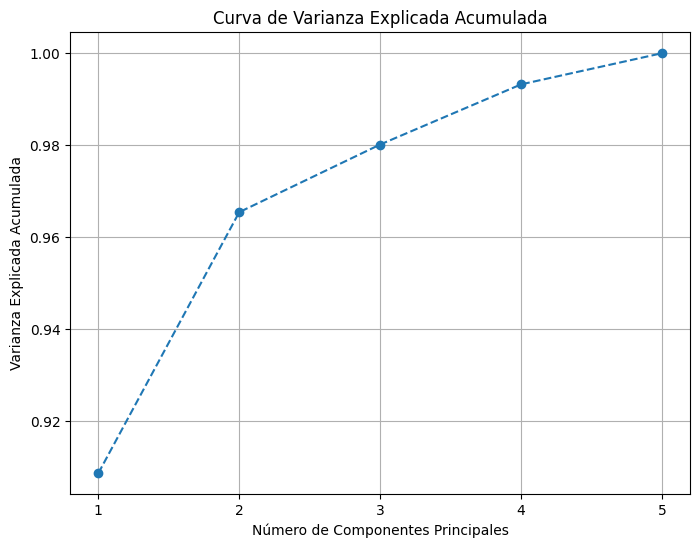

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.title('Curva de Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.show()

Las 2 primeras componentes principales son capaces de explicar mas del el 99% de la variabilidad.

In [23]:
# sns.pairplot(df_normalizado, hue='label')
# plt.show()

In [24]:
valores_pc = np.dot(df_normalizado.drop(columns=['label']), pca.components_[:5].T)
df_valores_pc = pd.DataFrame(valores_pc, columns=[f'PC{i+1}' for i in range(5)], index=df_normalizado.index)
df_normalizado = pd.concat([df_normalizado, df_valores_pc], axis=1)
df_normalizado.head()

,A,B,C,D,E,label,PC1,PC2,PC3,PC4,PC5
0,0.083333,0.195122,0.340909,0.0,0.333333,0.0,0.274332,0.419139,0.007042,-0.095174,0.110923
1,0.166667,0.213415,0.238636,0.0,0.000000,0.0,-0.053908,0.353731,0.007140,0.015948,0.043974
2,0.166667,0.268293,0.568182,0.0,0.000000,0.0,-0.085046,0.585023,0.020532,-0.113260,0.244653
3,0.125000,0.115854,0.238636,0.0,0.000000,0.0,-0.038882,0.270402,0.009501,0.001450,0.106174
4,0.000000,0.179878,0.193182,0.0,0.000000,0.0,-0.037858,0.235895,0.003155,-0.110881,0.017068


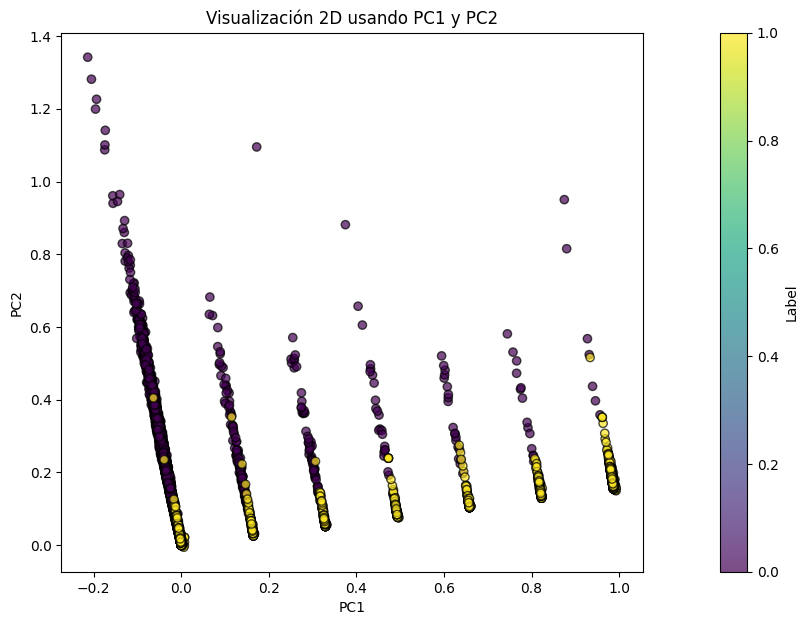

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el gráfico 2D
fig, ax = plt.subplots(figsize=(10, 7))

# Dibujar los puntos en el gráfico 2D usando PC1 y PC2 como coordenadas
scatter = ax.scatter(
    df_normalizado['PC1'], 
    df_normalizado['PC2'], 
    c=df_normalizado['label'].round(1), 
    cmap='viridis', 
    edgecolor='k', 
    alpha=0.7
)

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Visualización 2D usando PC1 y PC2')

# Agregar la barra de color para la etiqueta
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Label')

# Mostrar el gráfico
plt.show()

.- Dividimos los datos entre entrenamiento y test.

.- Entrenamos un nmodelo de Randomforest empleando los valores iniciales.

In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000, 1)
y_test shape: (2000, 1)


Precisión del modelo: 98.00%

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1012
         1.0       0.97      0.99      0.98       988

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



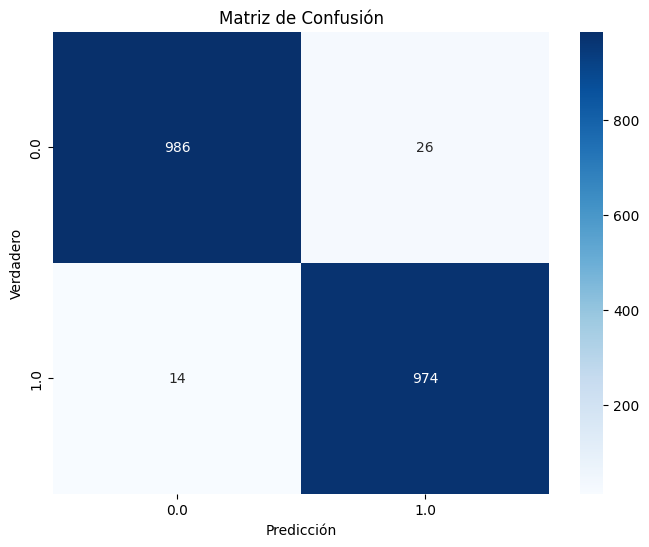

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train.values.ravel())

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2%}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

.- Empleando todas las variables [A...E] somos capaces de alcanzar un f1-score del 98%, que es bastante elevado.

.- Obtenemos mejores resultados para la clase '0' que para la '1' pero el modelo se comporta muy bien en todos los casos.

Vamos a trabajar ahora con un modelo que emplea las componentes principales, tratando de evaluar si es posible reducir la dimensionalidad manteniendo los mismos resultados.

In [28]:
X_reducido=df_normalizado.drop(columns=['label','A','B','C','D','E','PC4','PC5','PC3'])
y_reducido = df_normalizado[['label']]


X_reducido.head()

X_train_reducido, X_test_reducido, y_train_reducido, y_test_reducido = train_test_split(X_reducido, y_reducido, test_size=0.2, random_state=42)

print(X_reducido.head())
print(y_reducido.head())

        PC1       PC2
0  0.274332  0.419139
1 -0.053908  0.353731
2 -0.085046  0.585023
3 -0.038882  0.270402
4 -0.037858  0.235895
   label
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0


Precisión del modelo: 97.75%

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1012
         1.0       0.97      0.98      0.98       988

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



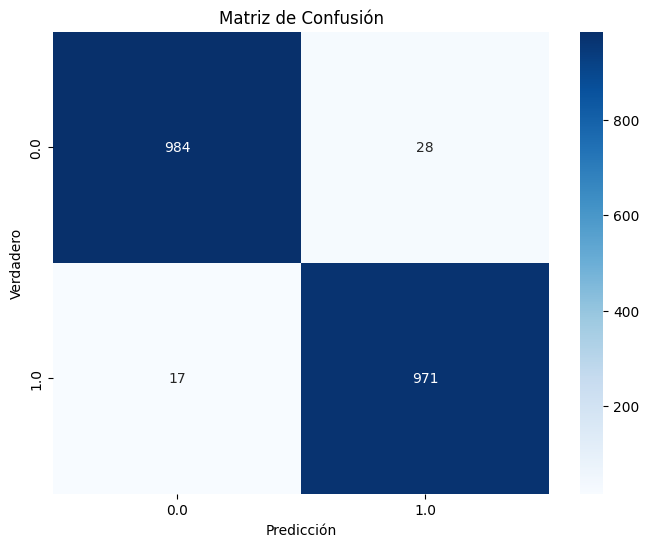

In [29]:

X_train_reducido, X_test_reducido, y_train_reducido, y_test_reducido = train_test_split(X_reducido, y_reducido, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_rf.fit(X_train_reducido, y_train_reducido.values.ravel())

# Hacer predicciones en el conjunto de prueba
y_pred_reducido = modelo_rf.predict(X_test_reducido)

# Evaluar el modelo
accuracy = accuracy_score(y_test_reducido, y_pred_reducido)
print(f"Precisión del modelo: {accuracy:.2%}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test_reducido, y_pred_reducido))

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test_reducido, y_pred_reducido)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

.- Con 3 PCs alcanzamos una explicacion de la variabliad de los de datos del 98%.

.- Un nodelo de Ramdom Forest empleando las 5 dimensiones iniciales proporciona una precision del 98.00%.

.- Reduciendo la dimensionalidad empleando las 3 PCs obtenemos un modelo con una precision muy similar, 97.80%

.- Es mas ventajoso el empleo de modelo basado en Componentes Principales ya que la diferencia en clasificado es menor del 0.20% y ahorramos campacidad computacional al emplear solo 3 dimetnsiones.

### t-SNE

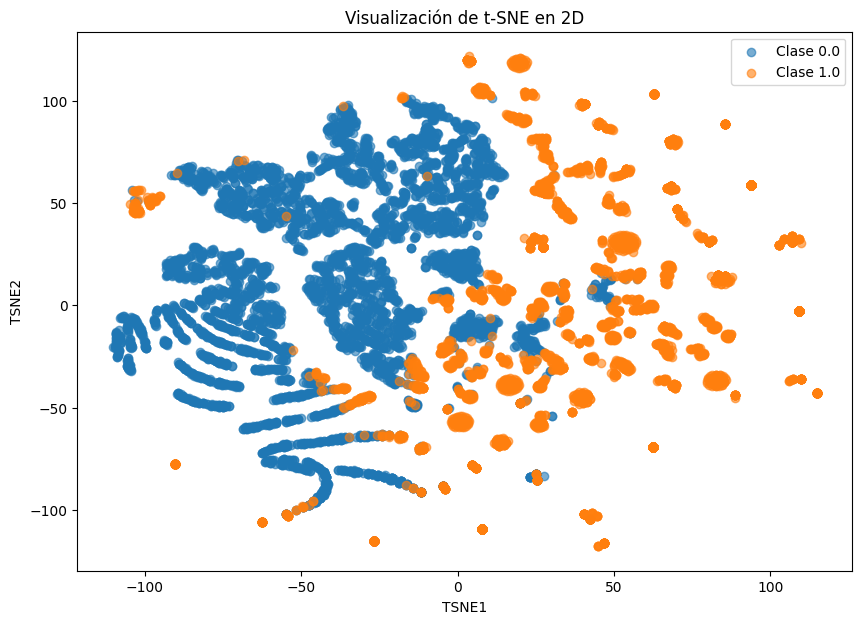

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


# Aplicar t-SNE con 2 componentes para visualización en 2D
tsne_2d = TSNE(n_components=2, random_state=0)
X_tsne_2d = tsne_2d.fit_transform(X)

# Convertir el resultado a un DataFrame para facilitar la visualización en 2D
df_tsne_2d = pd.DataFrame(X_tsne_2d, columns=['TSNE1', 'TSNE2'])
df_tsne_2d['label'] = y

# Graficar el resultado en 2D
plt.figure(figsize=(10, 7))
for label in df_tsne_2d['label'].unique():
    subset = df_tsne_2d[df_tsne_2d['label'] == label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Clase {label}', alpha=0.6)

plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("Visualización de t-SNE en 2D")
plt.legend()
plt.show()



1.- El algorimo de t-sne con 2 y 3 dimensiones muestran solapamiento entre los dos clusters, si bien el cluster de la clase 0 parece ser mas compacto que el de clase 1. Los elementos de 1 son muy dispersos.

### Utilizar t-SNE para clasificar

In [31]:
X_reducido_2=df_tsne_2d.drop(columns=['label'])
y_reducido_2 = df_tsne_2d[['label']] 


X_reducido_2.head()

X_train_reducido_2, X_test_reducido_2, y_train_reducido_2, y_test_reducido_2 = train_test_split(X_reducido_2, y_reducido_2, test_size=0.2, random_state=42)

print(X_reducido_2.head())
print(y_reducido_2.head())

       TSNE1      TSNE2
0  21.301867 -13.220984
1 -10.190127  58.068920
2  -4.618013  36.658642
3 -44.802586  65.788712
4 -65.697311  12.844844
   label
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0


Precisión del modelo: 97.50%

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1012
         1.0       0.97      0.98      0.97       988

    accuracy                           0.97      2000
   macro avg       0.98      0.98      0.97      2000
weighted avg       0.98      0.97      0.98      2000



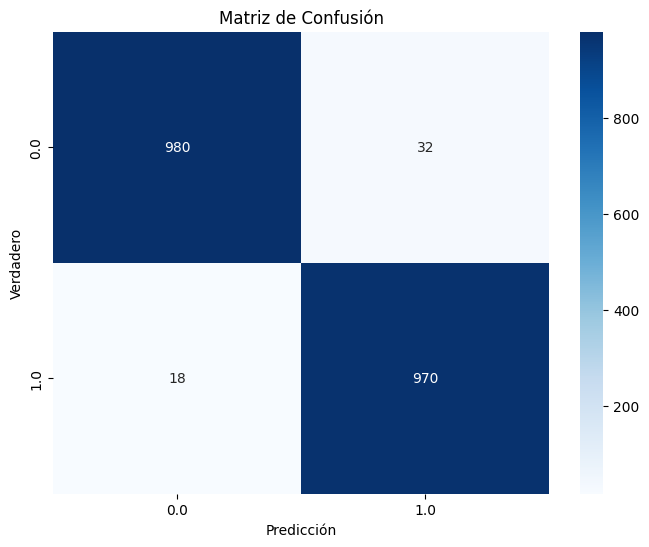

In [32]:
X_train_reducido_2, X_test_reducido_2, y_train_reducido_2, y_test_reducido_2 = train_test_split(X_reducido_2, y_reducido_2, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest
modelo_rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_rf_2.fit(X_train_reducido_2, y_train_reducido_2.values.ravel())

# Hacer predicciones en el conjunto de prueba
y_pred_reducido_2 = modelo_rf_2.predict(X_test_reducido_2)

# Evaluar el modelo
accuracy = accuracy_score(y_test_reducido_2, y_pred_reducido_2)
print(f"Precisión del modelo: {accuracy:.2%}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test_reducido_2, y_pred_reducido_2))

# Calcular la matriz de confusión
matriz_confusion_2 = confusion_matrix(y_test_reducido_2, y_pred_reducido_2)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_2, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


En general t-sne no es una buena tecnica para entrenar un clasificador. Con el set de datos actuales, el clasificador fue el que peor rendimiento obtuvo aunque sea alto. Las clases no se encuentran bien separadas hay solapamiento y el tratamiento local de t-sne no sirve para explicar las agrupaciones. 

### LDA

In [33]:
# Descargar las palabras vacías en español

# Preprocesar la columna 'comentario'

# Aplicar LDA

# Mostrar los temas


Preprocesamiento: Este paso convierte el texto en una matriz de términos.
Aplicación de LDA: Ejecuta el algoritmo LDA para encontrar los temas.
Visualización de Temas: Imprime los temas encontrados con las palabras más representativas.

### LDA en función del label

In [34]:
# Descargar las palabras vacías en español


# Definir función para aplicar LDA y obtener temas

# Aplicar LDA por cada etiqueta de label y guardar en archivos CSV
    # Crear un DataFrame para los temas

    
    # Guardar el DataFrame en un archivo CSV


In [35]:
# Generar bolsas de palabras para cada tema

# Asignar temas a comentarios

# Generar bolsas de palabras para cada etiqueta

# Asignar temas a comentarios y comparar con etiquetas reales

# Comparar temas asignados con etiquetas reales
